In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set()

/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [89]:
data_stock = pd.read_csv("/Users/benjaanabil/Downloads/sandp500/stock500.csv", index_col = 0)
data_stock.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [160]:
len(data_stock[data_stock['Name']=='WAT'])

1259

In [155]:
data_stock['Name'].unique()#all names categories have same lenght

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

Without using pytorch we just did somes test with lstm keras to predict price 'open' for somes name categories

In [143]:
#prediction of LOW price ALL name stock 
data_s_M = data_stock[data_stock['Name']=='GOOG']
data_s_M=data_s_M.open
data_s_M

date
2014-03-27     568.000
2014-03-28     561.200
2014-03-31     566.890
2014-04-01     558.710
2014-04-02     565.106
                ...   
2018-02-01    1162.610
2018-02-02    1122.000
2018-02-05    1090.600
2018-02-06    1027.180
2018-02-07    1081.540
Name: open, Length: 975, dtype: float64

In [144]:
#we Transform features by scaling each feature to a given range. 
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
red = MinMaxScaler()
data_s_M = (pd.DataFrame(data_s_M).values).reshape(data_s_M.shape[0],1)
data_s_MT = np.asarray(data_s_M)
data_s_MT = red.fit_transform(data_s_MT)
len(data_s_MT)

975

In [145]:
#we try to split our data in train and test

X,Y = [],[]
for i in range(len(data_s_MT)-4):
    X.append(data_s_MT[i:(i+3),0])
    Y.append(data_s_MT[(i+3),0])
X=np.array(X)
y=np.array(Y)
X_train,X_test = X[:int(X.shape[0]*0.70)],X[int(X.shape[0]*0.70):]
y_train,y_test = y[:int(y.shape[0]*0.70)],y[int(y.shape[0]*0.70):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

679
292
679
292


In [147]:
#add model
Lstm = Sequential()
Lstm.add(LSTM(256,input_shape=(3,1)))
Lstm.add(Dense(1))
Lstm.compile(optimizer='adam',loss='mse')
#get timestamp 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#we train the model
loss = Lstm.fit(X_train,y_train,epochs=40,validation_data=(X_test,y_test),shuffle=False)

Train on 679 samples, validate on 292 samples
Epoch 1/40
679/679 [==============================] - 1s 1ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 2/40
679/679 [==============================] - 0s 386us/step - loss: 0.0148 - val_loss: 0.0124
Epoch 3/40
679/679 [==============================] - 0s 357us/step - loss: 0.0040 - val_loss: 0.0013
Epoch 4/40
679/679 [==============================] - 0s 322us/step - loss: 6.2105e-04 - val_loss: 6.9638e-04
Epoch 5/40
679/679 [==============================] - 0s 345us/step - loss: 4.9230e-04 - val_loss: 5.1026e-04
Epoch 6/40
679/679 [==============================] - 0s 322us/step - loss: 5.9014e-04 - val_loss: 9.1378e-04
Epoch 7/40
679/679 [==============================] - 0s 272us/step - loss: 5.2150e-04 - val_loss: 8.7488e-04
Epoch 8/40
679/679 [==============================] - 0s 297us/step - loss: 4.1687e-04 - val_loss: 5.5471e-04
Epoch 9/40
679/679 [==============================] - 0s 213us/step - loss: 4.3360e-04 - val_loss: 5

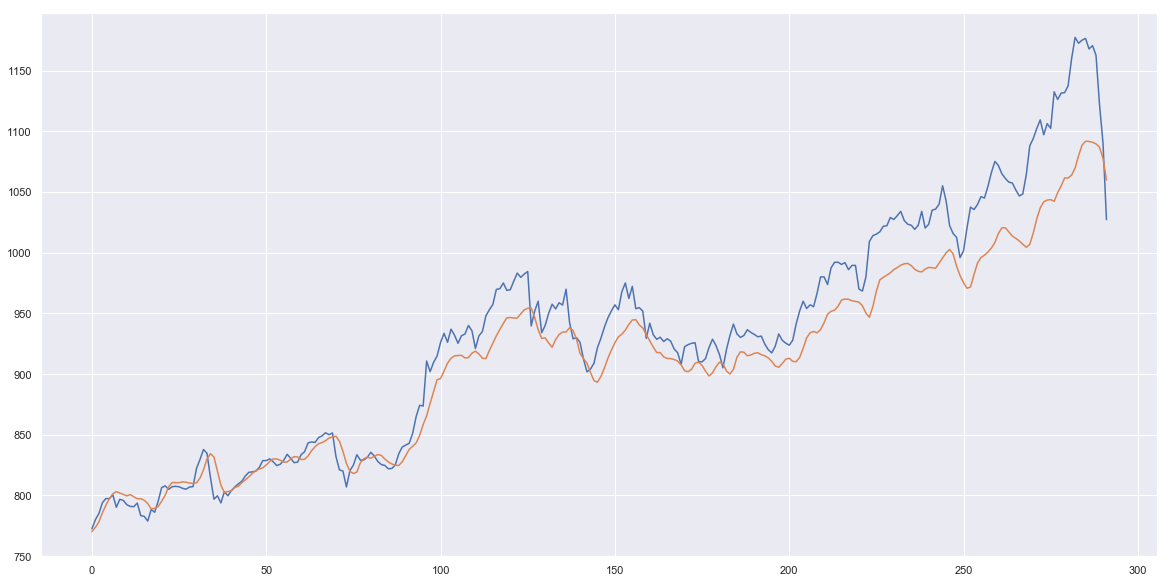

In [150]:
plt.figure(figsize=(20,10))
test_pred = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(test_pred))

In [152]:

reel = []
predicted = []
for i in range(50):

    test_pred = Lstm.predict(X_test[i].reshape(1,3,1))
    print('predicted:{0}, actual:{1}'.format(red.inverse_transform(test_pred),red.inverse_transform(y_test[i].reshape(-1,1))))
    predicted.append(red.inverse_transform(test_pred))
    reel.append(red.inverse_transform(y_test[i].reshape(-1,1)))
    

predicted:[[770.17065]], actual:[[772.48]]
predicted:[[773.70325]], actual:[[780.]]
predicted:[[778.11975]], actual:[[785.04]]
predicted:[[785.65247]], actual:[[793.9]]
predicted:[[791.79584]], actual:[[797.4]]
predicted:[[797.2607]], actual:[[797.34]]
predicted:[[801.3391]], actual:[[800.4]]
predicted:[[803.1131]], actual:[[790.22]]
predicted:[[801.95593]], actual:[[796.76]]
predicted:[[800.86816]], actual:[[795.84]]
predicted:[[799.5991]], actual:[[792.36]]
predicted:[[800.6653]], actual:[[790.9]]
predicted:[[798.8585]], actual:[[790.68]]
predicted:[[797.17444]], actual:[[793.7]]
predicted:[[797.2715]], actual:[[783.33]]
predicted:[[796.00854]], actual:[[782.75]]
predicted:[[793.29895]], actual:[[778.81]]
predicted:[[788.8439]], actual:[[788.36]]
predicted:[[789.3475]], actual:[[786.08]]
predicted:[[790.86676]], actual:[[795.26]]
predicted:[[795.1922]], actual:[[806.4]]
predicted:[[800.0053]], actual:[[807.86]]
predicted:[[807.11475]], actual:[[805.]]
predicted:[[810.59436]], actual:

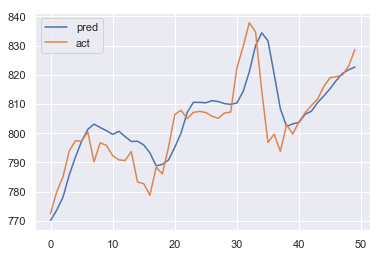

In [153]:
output = pd.DataFrame({'pred':list(np.reshape(predicted, (-1))),'act':list(np.reshape(reel, (-1)))})
output.plot(kind='line')

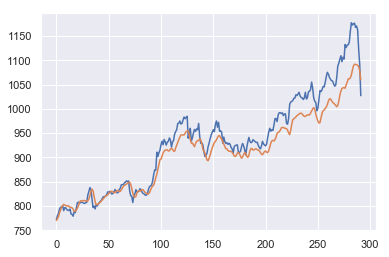

In [154]:
predicted_t = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(predicted_t))

In [148]:
#prediction of LOW price ALL name stock 
data_s_MM = data_stock[data_stock['Name']=='AAL']
data_s_MM=data_s_MM.low
data_s_MM

date
2013-02-08    14.63
2013-02-11    14.26
2013-02-12    14.10
2013-02-13    14.25
2013-02-14    13.16
              ...  
2018-02-01    53.59
2018-02-02    52.03
2018-02-05    49.75
2018-02-06    48.79
2018-02-07    50.89
Name: low, Length: 1259, dtype: float64

In [85]:
#we Transform features by scaling each feature to a given range. 
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
red = MinMaxScaler()
data_s_MM = (pd.DataFrame(data_s_MM).values).reshape(data_s_MM.shape[0],1)
data_s_MMM = np.asarray(data_s_MM)
data_s_MMM = red.fit_transform(data_s_MMM)
data_s_MMM

array([[0.04279379],
       [0.0345898 ],
       [0.03104213],
       ...,
       [0.82150776],
       [0.80022173],
       [0.84678492]])

In [120]:
#we try to split our data in train and test

X,Y = [],[]
for i in range(len(data_s_MMM)-4):
    X.append(data_s_MMM[i:(i+3),0])
    Y.append(data_s_MMM[(i+3),0])
X=np.array(X)
y=np.array(Y)
X_train,X_test = X[:int(X.shape[0]*0.70)],X[int(X.shape[0]*0.70):]
y_train,y_test = y[:int(y.shape[0]*0.70)],y[int(y.shape[0]*0.70):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

878
377
878
377


In [122]:
#add model
Lstm = Sequential()
Lstm.add(LSTM(256,input_shape=(3,1)))
Lstm.add(Dense(1))
Lstm.compile(optimizer='adam',loss='mse')
#get timestamp 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#we train the model
loss = Lstm.fit(X_train,y_train,epochs=40,validation_data=(X_test,y_test),shuffle=False)

Train on 878 samples, validate on 377 samples
Epoch 1/40
878/878 [==============================] - 1s 788us/step - loss: 0.0335 - val_loss: 0.0113
Epoch 2/40
878/878 [==============================] - 0s 250us/step - loss: 0.0330 - val_loss: 0.0118
Epoch 3/40
878/878 [==============================] - 0s 248us/step - loss: 0.0142 - val_loss: 0.0038
Epoch 4/40
878/878 [==============================] - 0s 251us/step - loss: 0.0028 - val_loss: 0.0011
Epoch 5/40
878/878 [==============================] - 0s 246us/step - loss: 9.9825e-04 - val_loss: 7.6188e-04
Epoch 6/40
878/878 [==============================] - 0s 291us/step - loss: 9.5509e-04 - val_loss: 7.8038e-04
Epoch 7/40
878/878 [==============================] - 0s 249us/step - loss: 9.5346e-04 - val_loss: 8.0477e-04
Epoch 8/40
878/878 [==============================] - 0s 250us/step - loss: 9.8000e-04 - val_loss: 8.7388e-04
Epoch 9/40
878/878 [==============================] - 0s 268us/step - loss: 0.0010 - val_loss: 9.7979e-04


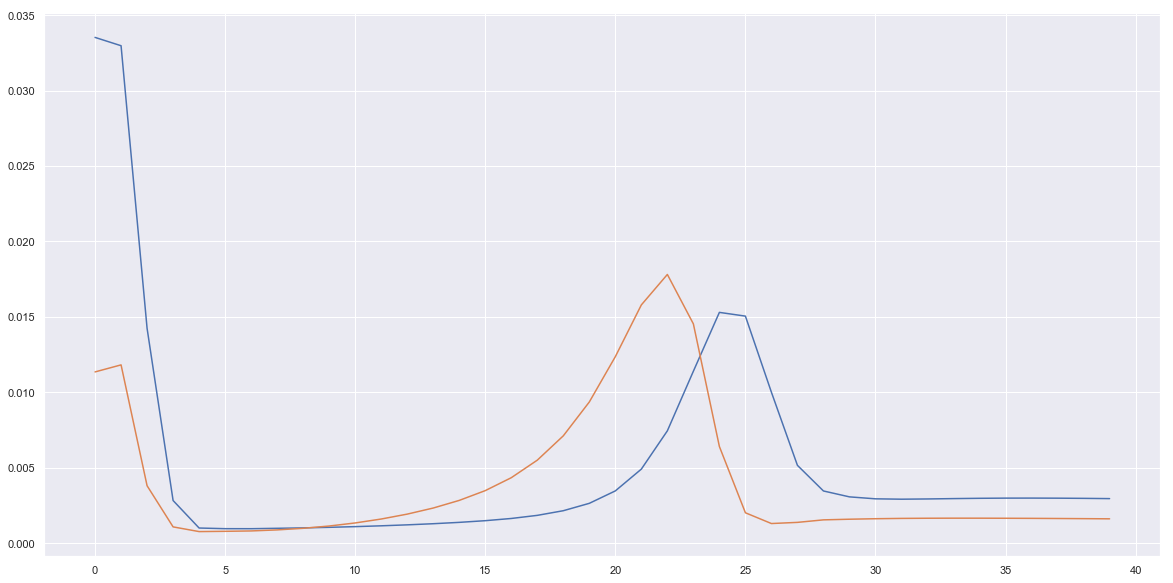

In [123]:
plt.figure(figsize=(20,10))
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])

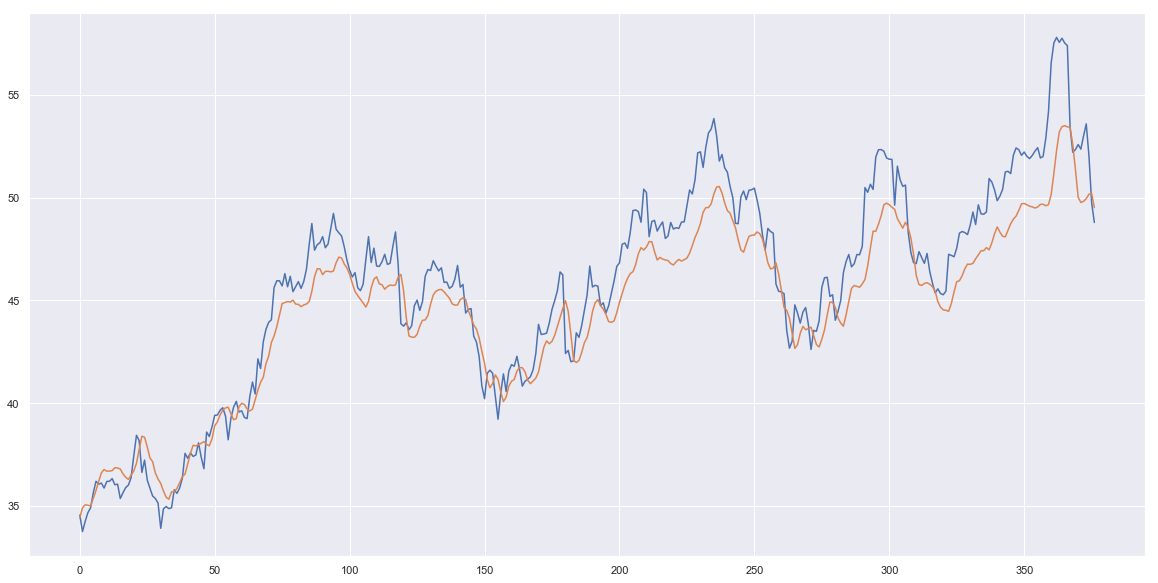

In [124]:
plt.figure(figsize=(20,10))
test_pred = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(test_pred))

In [126]:
reel = []
predicted = []
for i in range(50):

    test_pred = Lstm.predict(X_test[i].reshape(1,3,1))
    print('predicted:{0}, actual:{1}'.format(red.inverse_transform(test_pred),red.inverse_transform(y_test[i].reshape(-1,1))))
    predicted.append(red.inverse_transform(test_pred))
    reel.append(red.inverse_transform(y_test[i].reshape(-1,1)))
    

predicted:[[34.41776]], actual:[[34.54]]
predicted:[[34.902092]], actual:[[33.74]]
predicted:[[35.04292]], actual:[[34.24]]
predicted:[[35.02404]], actual:[[34.66]]
predicted:[[34.98914]], actual:[[34.9]]
predicted:[[35.361404]], actual:[[35.63]]
predicted:[[35.741077]], actual:[[36.19]]
predicted:[[36.185158]], actual:[[36.05]]
predicted:[[36.60225]], actual:[[36.101]]
predicted:[[36.763165]], actual:[[35.86]]
predicted:[[36.682384]], actual:[[36.18]]
predicted:[[36.68482]], actual:[[36.19]]
predicted:[[36.708103]], actual:[[36.32]]
predicted:[[36.850006]], actual:[[36.02]]
predicted:[[36.836185]], actual:[[36.05]]
predicted:[[36.788635]], actual:[[35.35]]
predicted:[[36.552395]], actual:[[35.63]]
predicted:[[36.38672]], actual:[[35.88]]
predicted:[[36.28251]], actual:[[36.]]
predicted:[[36.489136]], actual:[[36.36]]
predicted:[[36.689663]], actual:[[37.42]]
predicted:[[37.06439]], actual:[[38.43]]
predicted:[[37.741478]], actual:[[38.17]]
predicted:[[38.382187]], actual:[[36.62]]
pre

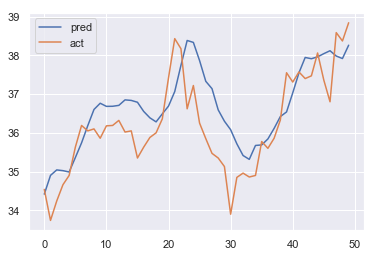

In [127]:
output = pd.DataFrame({'pred':list(np.reshape(predicted, (-1))),'act':list(np.reshape(reel, (-1)))})
output.plot(kind='line')

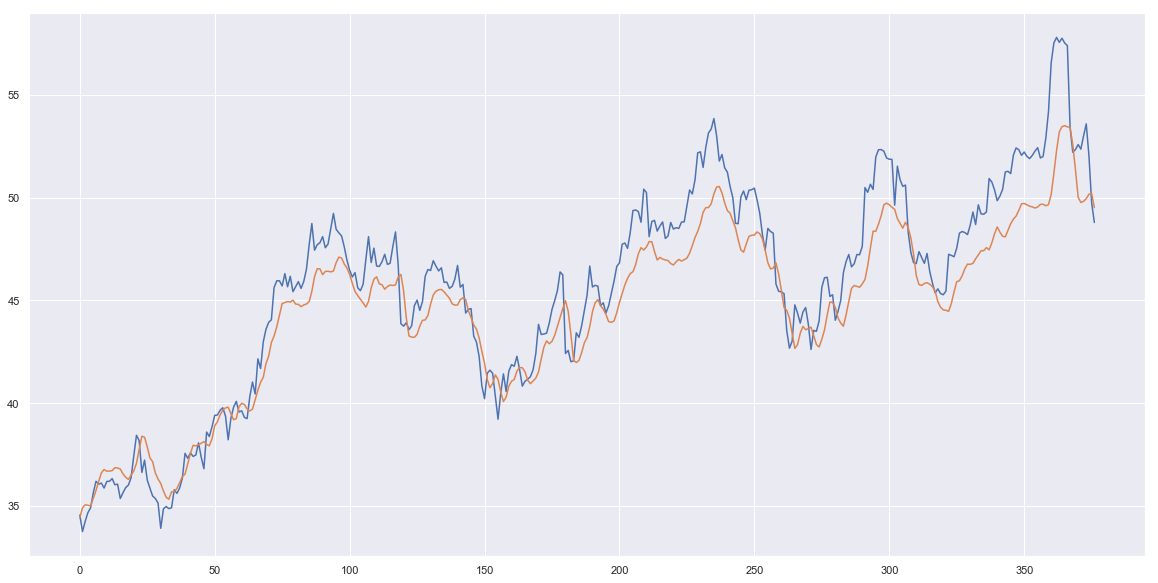

In [129]:
plt.figure(figsize=(20,10))
predicted_t = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(predicted_t))

In [63]:
#prediction of open price MMM name stock 
data_s_MM = data_stock[data_stock['Name']=='MMM']
data_s_MM=data_s_MM.open
data_s_MM

date
2013-02-08    102.34
2013-02-11    102.39
2013-02-12    102.66
2013-02-13    103.03
2013-02-14    102.43
               ...  
2018-02-01    247.44
2018-02-02    246.43
2018-02-05    243.50
2018-02-06    227.51
2018-02-07    233.19
Name: open, Length: 1259, dtype: float64

In [71]:
#we Transform features by scaling each feature to a given range. 
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
red = MinMaxScaler()
data_s_MM = (pd.DataFrame(data_s_MM).values).reshape(data_s_MM.shape[0],1)
data_s_MMM = np.asarray(data_s_MM)
data_s_MMM = red.fit_transform(data_s_MMM)
data_s_MMM

array([[0.00153443],
       [0.0018541 ],
       [0.00358033],
       ...,
       [0.90403427],
       [0.80180295],
       [0.83811777]])

In [72]:
def preproc(data,day):
    X,Y = [],[]
    for i in range(len(data)-day-1):
        X.append(data[i:(i+day),0])
        Y.append(data[(i+day),0])
    return np.array(X),np.array(Y)
X,y = preproc(data_s_MMM,8)
X_train,X_test = X[:int(X.shape[0]*0.70)],X[int(X.shape[0]*0.70):]
y_train,y_test = y[:int(y.shape[0]*0.70)],y[int(y.shape[0]*0.70):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

875
375
875
375


In [73]:
#add model
Lstm = Sequential()
Lstm.add(LSTM(256,input_shape=(8,1)))
Lstm.add(Dense(1))
Lstm.compile(optimizer='adam',loss='mse')
#get timestamp 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#we train the model
loss = Lstm.fit(X_train,y_train,epochs=40,validation_data=(X_test,y_test),shuffle=False)

Train on 875 samples, validate on 375 samples
Epoch 1/40
875/875 [==============================] - 1s 1ms/step - loss: 6.7867e-04 - val_loss: 0.0060
Epoch 2/40
875/875 [==============================] - 0s 557us/step - loss: 0.0067 - val_loss: 0.0036
Epoch 3/40
875/875 [==============================] - 0s 555us/step - loss: 0.0038 - val_loss: 6.8010e-04
Epoch 4/40
875/875 [==============================] - 0s 514us/step - loss: 3.9647e-04 - val_loss: 4.2614e-04
Epoch 5/40
875/875 [==============================] - 0s 532us/step - loss: 2.7024e-04 - val_loss: 4.7951e-04
Epoch 6/40
875/875 [==============================] - 0s 508us/step - loss: 3.1529e-04 - val_loss: 4.4831e-04
Epoch 7/40
875/875 [==============================] - 0s 550us/step - loss: 3.1979e-04 - val_loss: 5.3411e-04
Epoch 8/40
875/875 [==============================] - 0s 516us/step - loss: 4.8795e-04 - val_loss: 5.0160e-04
Epoch 9/40
875/875 [==============================] - 0s 556us/step - loss: 3.5773e-04 - val

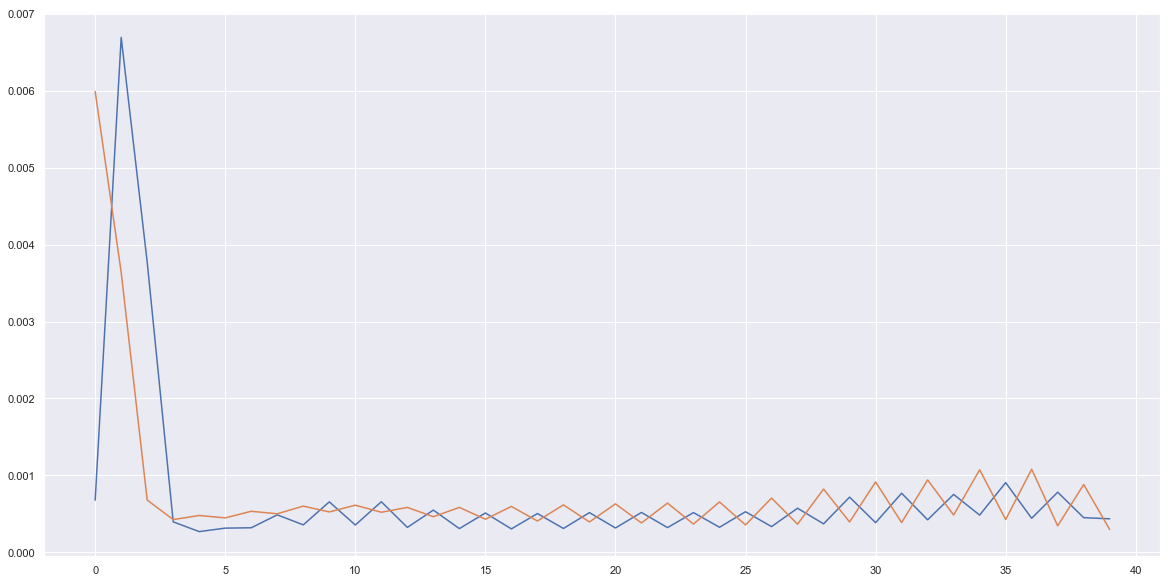

In [80]:
plt.figure(figsize=(20,10))
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])

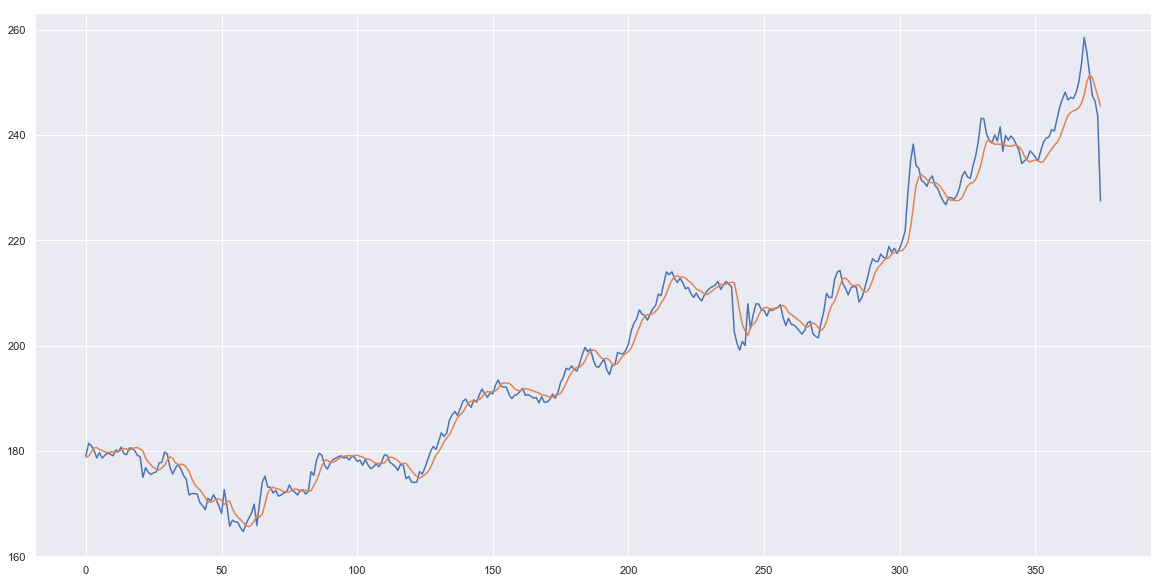

In [81]:
plt.figure(figsize=(20,10))
test_pred = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(test_pred))

In [77]:

reel = []
predicted = []
for i in range(50):

    test_pred = Lstm.predict(X_test[i].reshape(1,8,1))
    print('predicted:{0}, actual:{1}'.format(red.inverse_transform(test_pred),red.inverse_transform(y_test[i].reshape(-1,1))))
    predicted.append(red.inverse_transform(test_pred))
    reel.append(red.inverse_transform(y_test[i].reshape(-1,1)))
    

predicted:[[178.82866]], actual:[[179.08]]
predicted:[[178.99138]], actual:[[181.47]]
predicted:[[179.83351]], actual:[[181.]]
predicted:[[180.52673]], actual:[[180.12]]
predicted:[[180.67548]], actual:[[178.67]]
predicted:[[180.25922]], actual:[[179.7]]
predicted:[[180.08453]], actual:[[178.66]]
predicted:[[179.82645]], actual:[[179.18]]
predicted:[[179.71817]], actual:[[179.61]]
predicted:[[179.80737]], actual:[[179.41]]
predicted:[[179.82574]], actual:[[179.09]]
predicted:[[179.72948]], actual:[[180.19]]
predicted:[[179.93239]], actual:[[179.86]]
predicted:[[180.12137]], actual:[[180.72]]
predicted:[[180.42908]], actual:[[179.49]]
predicted:[[180.39987]], actual:[[179.31]]
predicted:[[180.18608]], actual:[[180.53]]
predicted:[[180.33957]], actual:[[180.56]]
predicted:[[180.59912]], actual:[[180.04]]
predicted:[[180.64835]], actual:[[179.19]]
predicted:[[180.36256]], actual:[[178.89]]
predicted:[[179.99681]], actual:[[175.]]
predicted:[[178.65906]], actual:[[176.83]]
predicted:[[177.

<Figure size 1440x720 with 0 Axes>

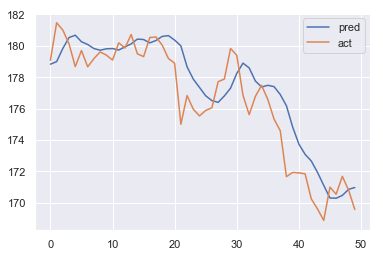

In [82]:
output = pd.DataFrame({'pred':list(np.reshape(predicted, (-1))),'act':list(np.reshape(reel, (-1)))})
output.plot(kind='line')

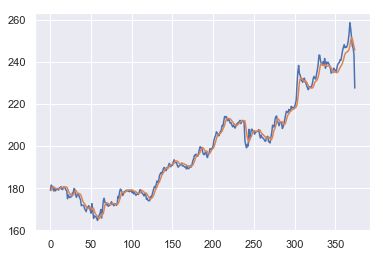

In [83]:
predicted_t = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(predicted_t))

In [161]:
#prediction of open price MMM name stock 
data_s_MM = data_stock[data_stock['Name']=='MMM']
data_s_MM=data_s_MM[['open','low']]
data_s_MM

,open,low
date,,
2013-02-08,102.34,102.0400
2013-02-11,102.39,102.0401
2013-02-12,102.66,102.6300
2013-02-13,103.03,102.5800
2013-02-14,102.43,102.2200
...,...,...
2018-02-01,247.44,246.1795
2018-02-02,246.43,244.8800
2018-02-05,243.50,226.0100


In [163]:
#we Transform features by scaling each feature to a given range. 
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
red = MinMaxScaler()
data_s_MM = (pd.DataFrame(data_s_MM).values).reshape(2518,1)
data_s_MMM = np.asarray(data_s_MM)
data_s_MMM = red.fit_transform(data_s_MMM)
data_s_MMM

array([[0.00376372],
       [0.00184996],
       [0.00408267],
       ...,
       [0.79778005],
       [0.8384792 ],
       [0.83612529]])